- 혼자 공부하는 머신러닝+딥러닝

**라이브러리 설치**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 3강. 마켓과 머신러닝

전통적인 프로그램은 사용자에게 규칙을 찾아 컴퓨터에게 적용시키는 그림이었으나,

컴퓨터에게 데이터를 규입시켜 스스로 규칙을 찾게끔하는 그림이 되었다. 

### 3-1. 생선 분류문제 (도미와 빙어)

#### 3-1-1. 도미데이터와 빙어데이터 준비하기

In [2]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

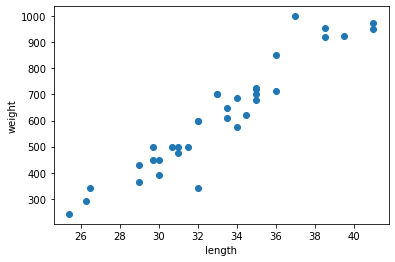

In [3]:
# 도미
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

도미 데이터의 무게와 길이를 가지고 산점도를 나타내었다. 어느 정도의 선형관계를 띤다

In [4]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

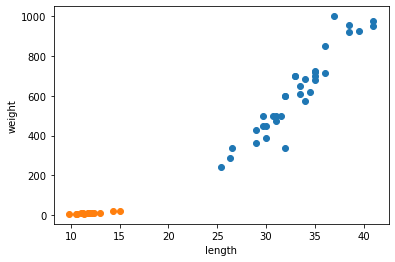

In [5]:
# 빙어
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

이번에는 빙어와 도미에 대해 나타내어 보았다. (도미는 파란색, 빙어는 주황색)

#### 3-1-2. 첫번째 머신러닝 프로그램

두 생선의 길이들을 그냥 이어연결해준다. 

In [6]:
length = bream_length+smelt_length
weight = bream_weight+smelt_weight

In [7]:
fish_data = [[l,w] for l, w in zip(length, weight)]
fish_data[1]

[26.3, 290.0]

In [8]:
fish_target = [1]*35 + [0]*14
fish_target

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

**!알고가자 : k-최근접 이웃**

가장 가까운 것이 무엇이냐를 물어보는 라이브러리 : KNeighborsClassifier

In [9]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)
kn.score(fish_data, fish_target)

1.0

100퍼 센트로 맞출 수 있다고 컴퓨터에게 전해들었다. 

가상의 생선을 만들어 실험해보았다. 

In [10]:
kn.predict([[30,600]])

array([1])

array([1]) = 도미다. 예측성공!

In [11]:
kn49 = KNeighborsClassifier(n_neighbors=49) #가장 가까운 데이터 49개를 사용하겠다 는 얘기

kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

In [12]:
print(35/49)

0.7142857142857143


### 4강. 훈련세트와 테스트 세트로 나누어 사용하기 

In [13]:
train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

### 4-1. 테스트 세트에서 평가하기

In [14]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn = kn.fit(train_input, train_target)

kn.score(test_input, test_target)

0.0

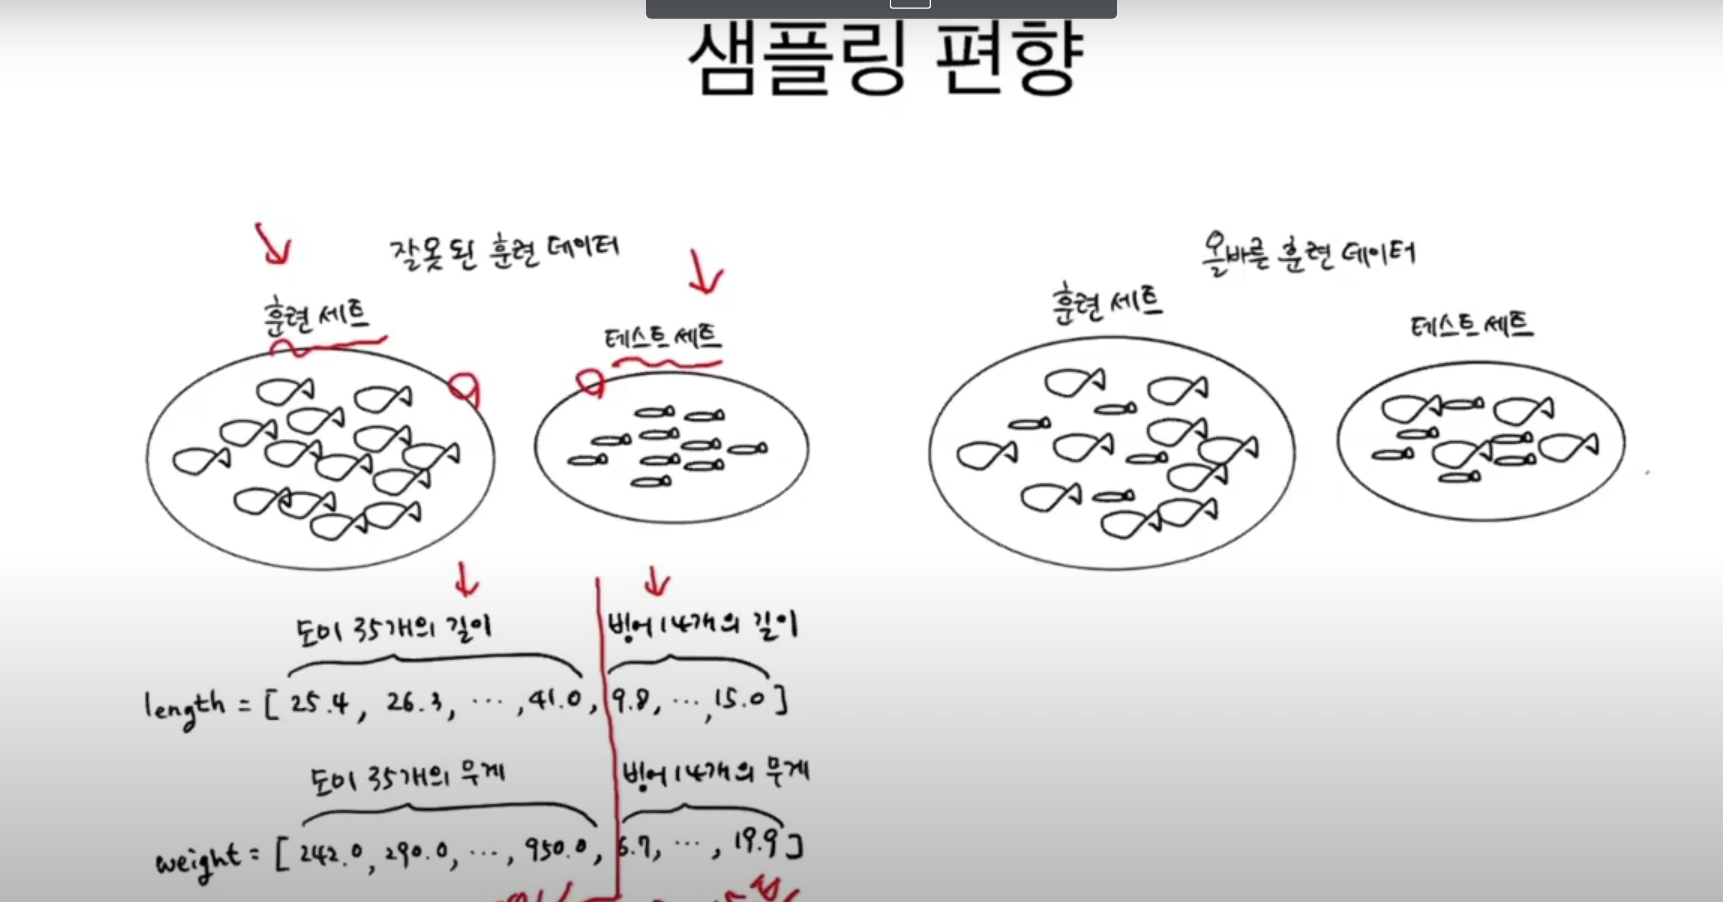

0점이 나온 이유는 배우지도 않은 테스트 데이터인 방어 데이터를 알아맞추라고 하기 때문이다. 

### 4-2. 제대로 하기 

**4-2-1. 데이터 변형하기**

In [15]:
# 1차원 배열에서 2차원 배열로 변형시킨다. 

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)
input_arr

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


**4-2-2. 데이터 섞기**

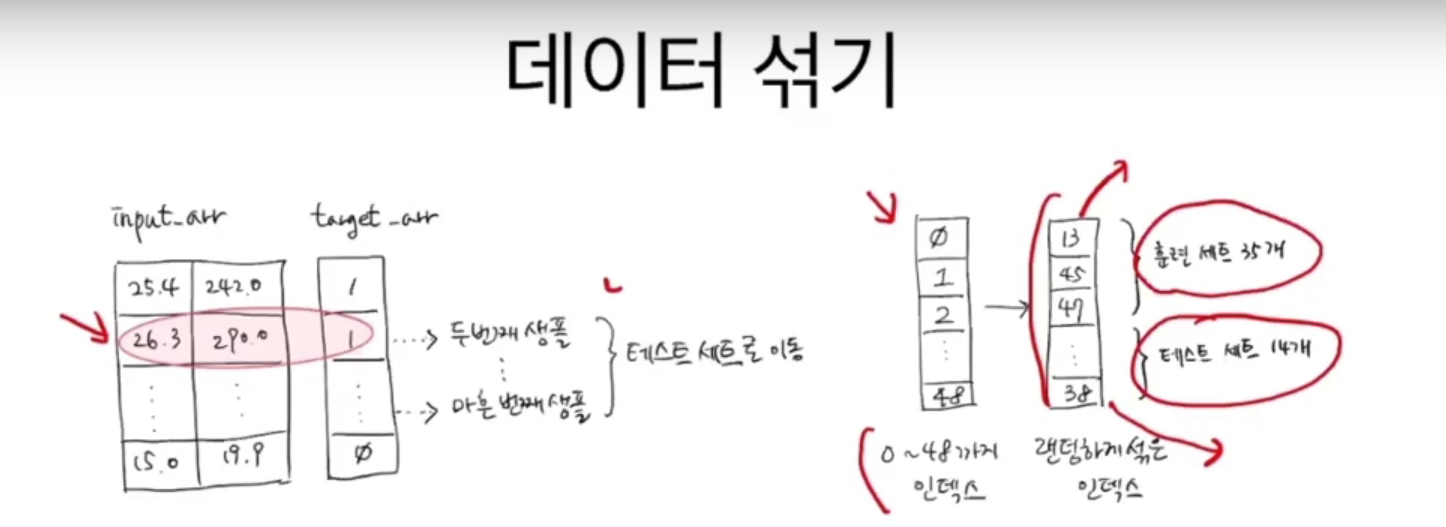

In [16]:
index = np.arange(49) #49개를 넣어줄게
np.random.shuffle(index) #무작위로 변형시켜

In [17]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]
 
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

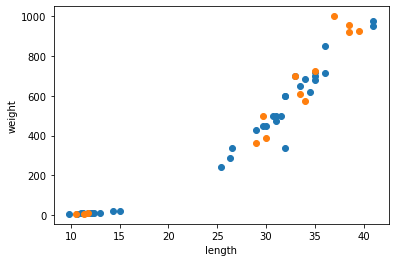

In [18]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 5강. 정교한 결과 도출을 위한 데이터 전처리

**5-1-1. 넘파이로 데이터 섞기**

In [19]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [20]:
np.column_stack(([1,2,3], [4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

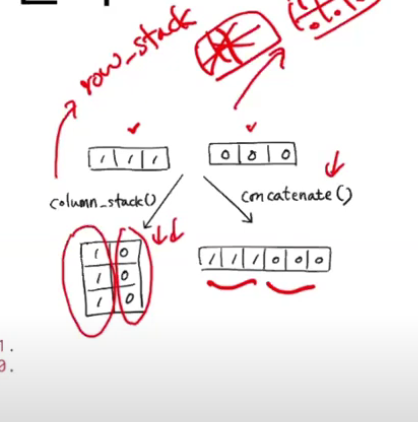

배열을 만든다. 

In [21]:
fish_data = np.column_stack((fish_length, fish_weight))

In [22]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [23]:
print(np.ones(5))
np.zeros(5)

[1. 1. 1. 1. 1.]


array([0., 0., 0., 0., 0.])

1이나 0으로 채워진 배열을 만들 수 있다. 

In [24]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [25]:
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

**5-1-2. 사이킷런으로 데이터 나누기**

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target,
                                                                     stratify=fish_target, random_state=42)

stratify : 데이터편향을 막기 위해 사용하였다. 보통 양쪽의 데이터가 많다면, 문제 없지만, 데이터가 적은 경우에는 이렇게 할 수 밖에 없다는 것을 명심하길...

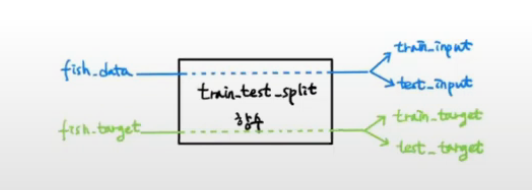

**수상한 도미**

[0.]


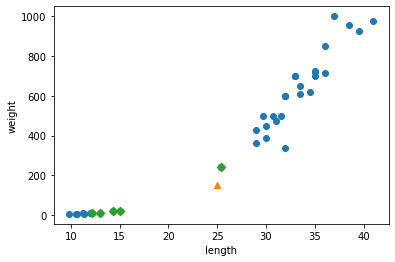

In [28]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

print(kn.predict([[25,150]]))

distances, indexes = kn.kneighbors([[25,150]])

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

누가봐도 도미인데 왜 빙어로 착각하는지 모르겠다. <br>

둘이 x축과 y축을 확인해보면, scale이 맞지 않기 때문이다. 

**scale 맞추기**

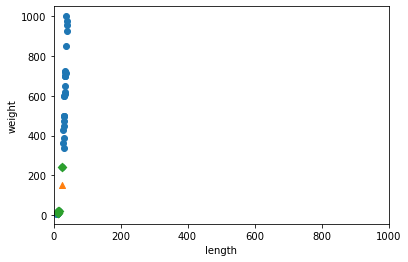

In [29]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')

plt.xlim((0,1000)) #scale 시키는 것
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

**표준 점수로 바꾸기**

Z점수로 바꾼다는 말이다. 

In [30]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

print(mean, std) 

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


각각의 특성마다 평균과 표준편차가 구해졌다.

In [31]:
train_scaled = (train_input - mean) / std

**수상한 도미 다시 표시하기**

In [32]:
new = ([25, 150] - mean) / std

In [33]:
new

array([-0.23012627, -0.94060693])

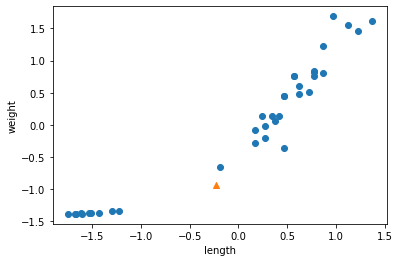

In [34]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

**전처리 데이터에서 모델 훈련**

[1.]


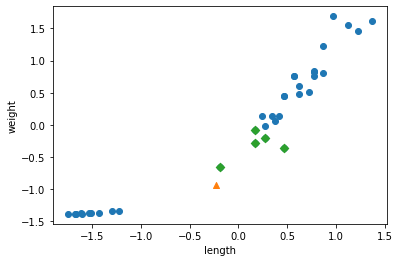

In [35]:
kn.fit(train_scaled, train_target)

test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

print(kn.predict([new]))

distances, indexes = kn.kneighbors([new])

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 6강. 회귀 문제를 이해하고 k-최근접 이웃 알고리즘 풀어보기 

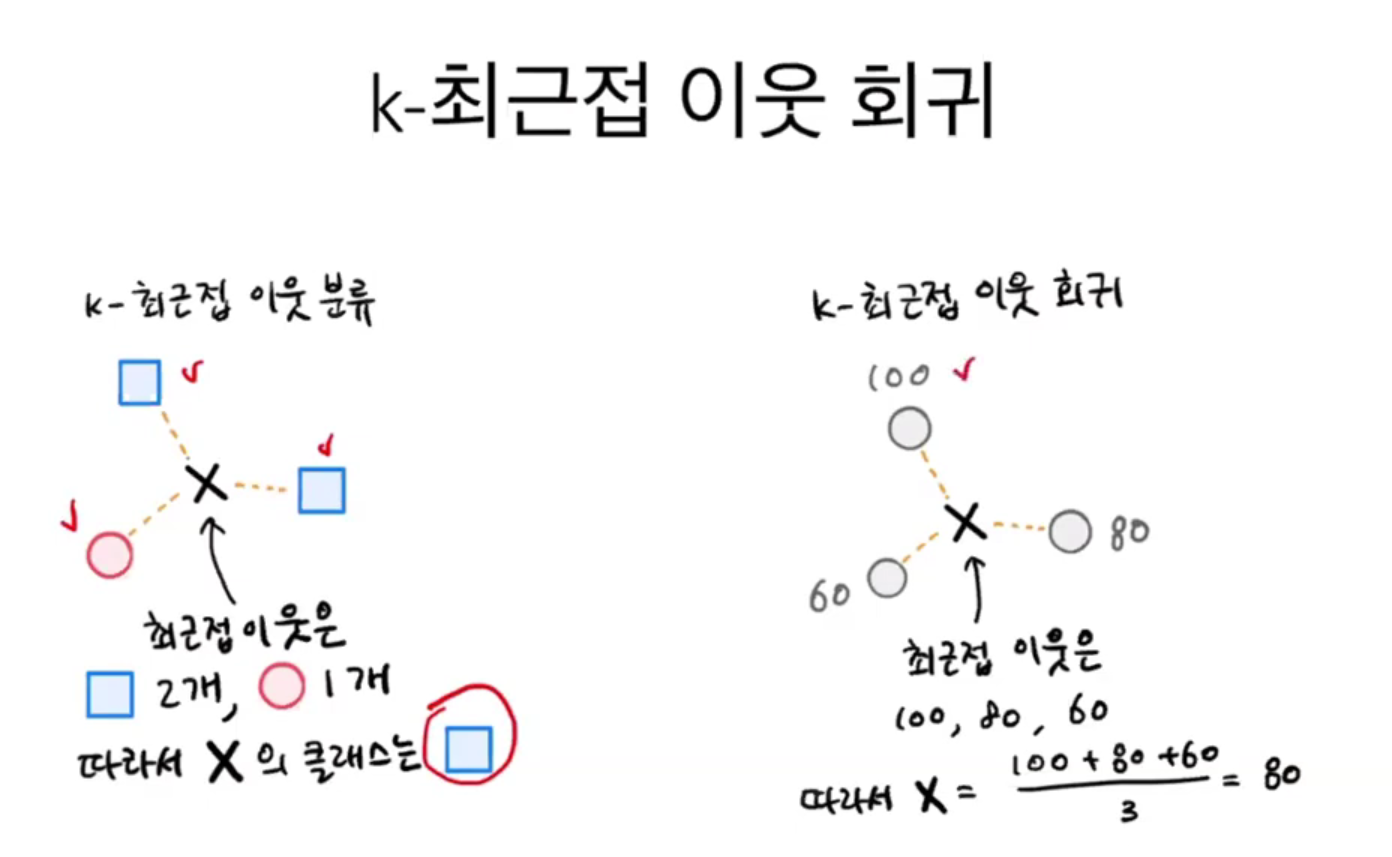

In [36]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

1차원 배열로 농어의 데이터를 구해보았다. 

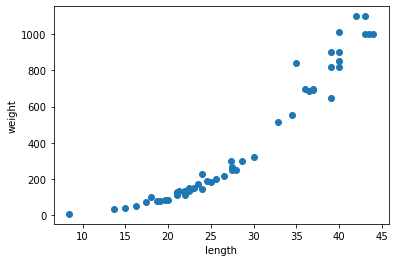

In [37]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#### 훈련 세트 준비

In [38]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight,
                                                                     random_state=42)

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

train_input = train_input.reshape(-1,1)
1차원에서 2차원으로 바꿔주는 reshape 함수를 사용하였다. <br>
reshape(-1,1) 해석, <br>
1번째 행차원을 -1로 지정하고, 2번째 행차원을 1로 지정하였다.이러면 하나의 열이 있는 2차원 배열생성 <br>
-1 : 모든 행을 사용하겠다. // 1 : 열 선택

**회귀 모델훈련**

In [39]:
from sklearn.neighbors import KNeighborsRegressor #회귀, 분류는 'KNeighborsClassfier'

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

knr.score(test_input, test_target)

0.992809406101064

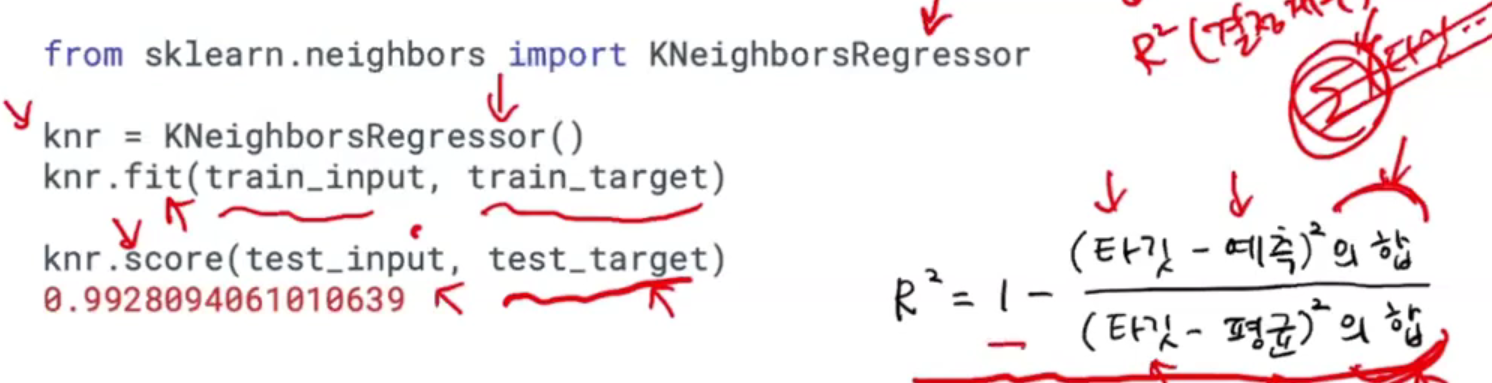

결정계수가 1에 가까우므로, 성능이 좋은 회귀모델이라고 볼 수 있다. <br>
보통 0.6까지 가면 좋지 못한 모델이라고도 본다. 

In [40]:
from sklearn.metrics import mean_absolute_error #평균절댓값오차

test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
mae

19.157142857142862

19g 정도 오차가 난다고 볼 수 있다. 

**과대적합과 과소적합**

In [41]:
print(knr.score(train_input, train_target))
knr.score(test_input, test_target)

0.9698823289099254


0.992809406101064

일반적으로, train이 test보다 높게 나와야 한다. 따라서 위 문제는 훈련세트를 적절히 훈련받지 못해 과소적합이라는 것을 볼 수 있다. 

**이웃 개수 줄이기**

In [42]:
knr.n_neighbors = 3
knr.fit(train_input, train_target)

print(knr.score(train_input, train_target))
knr.score(test_input, test_target)

0.9804899950518966


0.9746459963987609

너무 동떨어 있지도 않고, 과대와 과소가 보이지 않는다. 

### 7강. 사이킷런으로 선형 회귀 모델 만들어 보기

In [43]:
knr.predict([[50]])

array([1033.33333333])

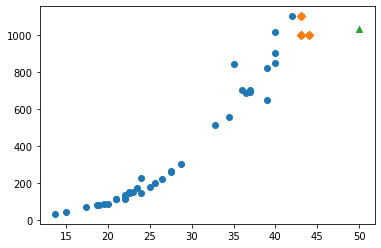

In [44]:
# 50cm 농어의 이웃을 구한다.

distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그린다.
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그린다. 
plt.scatter(train_input[indexes], train_target[indexes],
           marker='D')

# 50cm 농어 데이터 
plt.scatter(50, 1033, marker='^')
plt.show()

In [50]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

# 50cm 농어에 대한 예측
print(lr.predict([[50]]))

print(lr.coef_, lr.intercept_) 
#기울기는 리스트로 표현되었다.

[1241.83860323]
[39.01714496] -709.0186449535477


현재 농어의 직선에 대한 식은 y=39.0174496  -709.0186449535477 

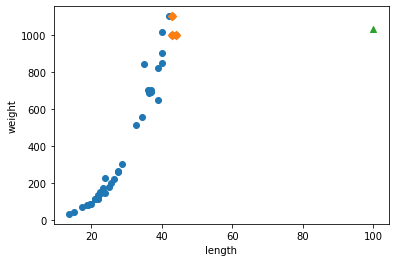

In [62]:
# 100cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 100cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

학습한 직선 그리기

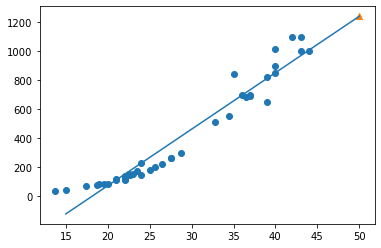

0.939846333997604
0.8247503123313558


In [57]:
# 훈련 세트의 산점도를 그린다. 
plt.scatter(train_input, train_target)

#15에서 50까지의 1차 방정식 그래프를 그립니다. 
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.show()

print(lr.score(train_input, train_target))

print(lr.score(test_input, test_target))

### 다항회귀

In [64]:
train_poly = np.column_stack((train_input **2, train_input))
test_poly = np.column_stack((test_input **2, test_input))

In [65]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [66]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

print(lr.coef_, lr.intercept_)

[1573.98423528]
[  1.01433211 -21.55792498] 116.0502107827831


학습한 직선 그리기 

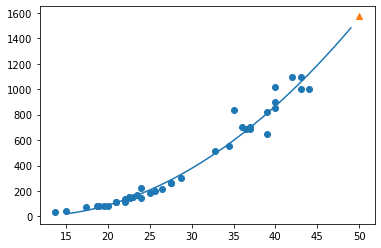

0.9706807451768623
0.9775935108325122


In [69]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만든다. 
point = np.arange(15,50)

# 훈련 세트의 산점도를 그린다. 
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프를 그린다. 
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm 농어 데이터
plt.scatter([50], [1574], marker='^')
plt.show()

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))